# Assignment 2

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Linear Regression

Let's set up our workspace and use the **Auto MPG dataset**. This dataset contains several features (such as horsepower, weight, displacement, and acceleration) and a target variable indicating the car's **miles per gallon (MPG)**.

Here, we will model **MPG (continuous outcome)** based on the car's physical and performance characteristics.

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
import seaborn as sns

# Load the Auto MPG dataset
mpg_data = sns.load_dataset('mpg')

# Drop rows with missing values
mpg_data = mpg_data.dropna(subset=['mpg', 'horsepower', 'weight', 'displacement'])

# Display the DataFrame
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


#### **Question 1:**  
#### Data inspection

Before fitting any model, it is essential to understand our data. **Use Python code** to answer the following questions about the **Auto MPG dataset**:

_(i)_ How many observations (rows) does the dataset contain and also how many variables (columns) does the dataset contain?

In [4]:
# Your answer here...

# for rows
mpg_data.shape[0]

print(f'There are {mpg_data.shape[0]} rows.')

There are 392 rows.


In [5]:
# for columns
mpg_data.shape[1]

print(f'There are {mpg_data.shape[1]} columns.')

There are 9 columns.


_(ii)_ What is the 'variable type' of the response variable `mpg` (e.g., 'integer', 'category', etc.) and explain what it is in short? (1-2 sentences at max)

In [6]:
# Your answer here...

mpg_data['mpg'].dtypes

mpg_type = mpg_data['mpg'].dtypes

print(f'mpg is an {mpg_type}')

# mpg is a float, which means it is a number that can have decimals.

mpg is an float64


Your explanation... 

mpg is a float, which means it is a number that can have decimals.


_(iii)_ Find the 5 rows with the greatest `horsepower`.

In [7]:
# Your answer here... 
horsepower_sort = mpg_data.sort_values(by = 'horsepower', ascending = False)
horsepower_sort.head(5)

# Used a website for help: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
116,16.0,8,400.0,230.0,4278,9.5,73,usa,pontiac grand prix
95,12.0,8,455.0,225.0,4951,11.0,73,usa,buick electra 225 custom
13,14.0,8,455.0,225.0,3086,10.0,70,usa,buick estate wagon (sw)
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala


_(iv)_ How many predictor variables do we have (Hint: all variables other than `mpg`)?

In [8]:
# The number of predictor variables is the number of columns minus one.

num_predictors = mpg_data.shape[1] - 1
print(f'The number of predictor variables is {num_predictors}.')

The number of predictor variables is 8.


You can use `print()` and `describe()` to help answer these questions.

#### **Question 2:** 
#### Data-visualization

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below.

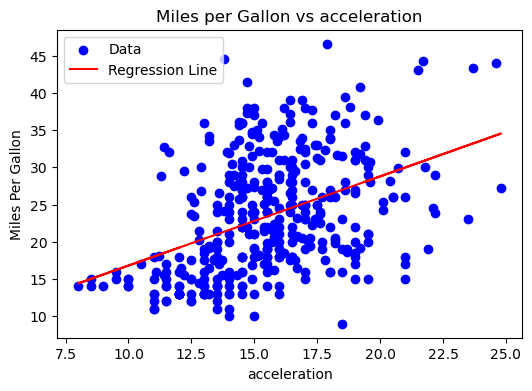

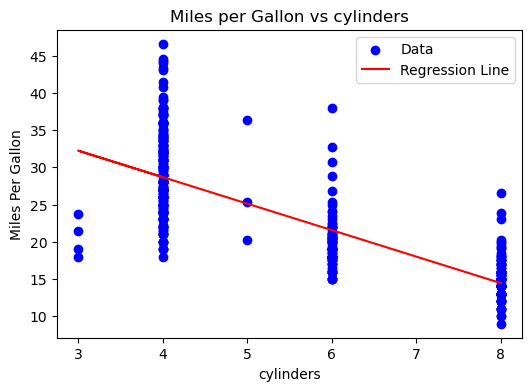

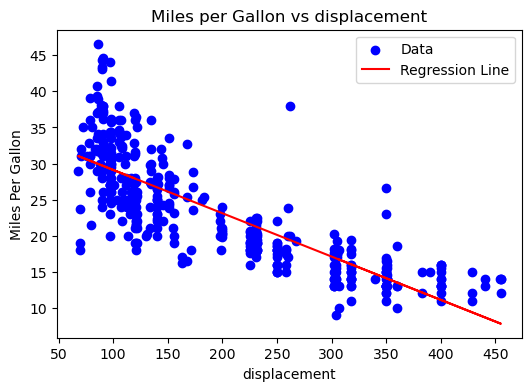

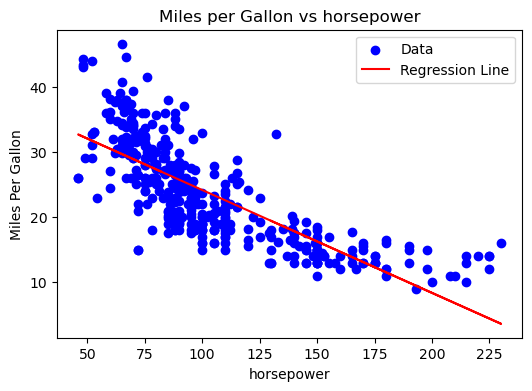

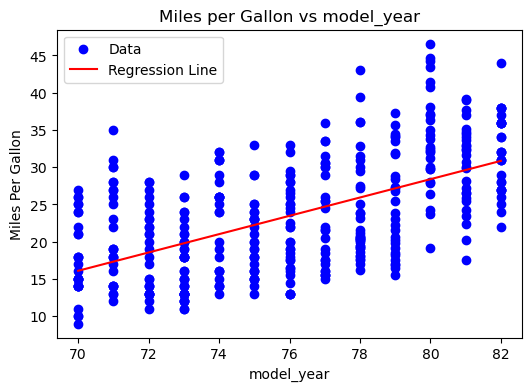

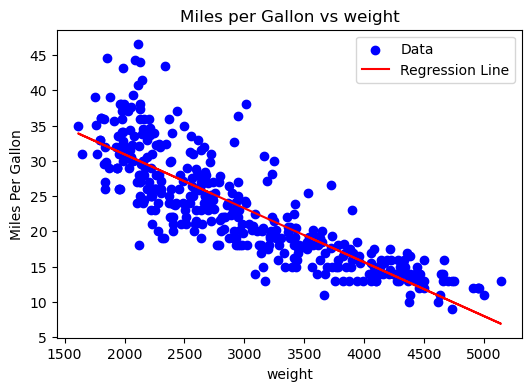

In [9]:
# Exclude the 'mpg' (target variable) and non-numeric columns from the feature names
feature_names = mpg_data.select_dtypes(include=[float, int]).columns.difference(['mpg'])

# Loop through each numeric feature (column) in mpg_data
for feature in feature_names:
    # Extract the feature column and target variable (mpg)
    X_feature = mpg_data[[feature]].values  # Extract as a 2D array
    y = mpg_data['mpg'].values  # Target variable (mpg)
    
    # Create a scatter plot for the feature against the target (mpg)
    plt.figure(figsize=(6, 4))
    plt.scatter(X_feature, y, label='Data', color='blue')

    # Fit a linear regression model
    lm = LinearRegression()
    lm.fit(X_feature, y)

    # Plot the regression line
    plt.plot(X_feature, lm.predict(X_feature), color='red', label='Regression Line')

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Miles Per Gallon')
    plt.title(f'Miles per Gallon vs {feature}')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

Answer the following questions:

_(i)_ Describe the associations being plotted ? (i.e., positive association, negative association, no association)

Miles per gallon appears to be positively associated with acceleration and model_year.
Miles per gallon appears to be negatively associated with cylinders, displacement, horsepower, and weight.

_(ii)_ What concept ‘defines’ the plotted line?

The plotted line is the line of best fit based on the equation for linear regression (y = mx + b for each parameter).  

_(iii)_ Do all data points in the dataset fall perfectly along the plotted line? If not, why might there be deviations between the data points and the line, and what do these deviations indicate about the relationship between the variables?

In all datasets, there are numerous deviations between the data points and the plotted line, indicating variability, outliers, and the fact that the line is not perfectively predictive.

#### **Question 3:**  
#### Model fit  
Now, let’s fit a multivariable linear regression model using the general syntax `lm()`. As above, use **mpg** as the response variable **Y**, and all other variables as the predictors.

**Step 1: Split the dataset into train and test sets, using a 75-25 split. (use random_state=42)**

In [10]:
# Your answer here...

mpg_data_train, mpg_data_test = train_test_split(mpg_data, train_size = 0.75, random_state=42)

# Used a website for help: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [11]:
X_train = mpg_data_train.select_dtypes(include=[float, int]).drop('mpg', axis = 1)
y_train = mpg_data_train['mpg']

In [12]:
print(mpg_data_train.shape[0])
print(y_train.shape[0])


294
294


**Step 2: Fit the linear regression model.**

In [13]:
lm = LinearRegression()

In [14]:
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [15]:
numeric_predictors = mpg_data.select_dtypes(include=[float, int]).drop('mpg', axis = 1)
numeric_predictors

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82
394,4,97.0,52.0,2130,24.6,82
395,4,135.0,84.0,2295,11.6,82
396,4,120.0,79.0,2625,18.6,82


In [16]:
# Your code here ...

lm.fit(X_train, y_train)

# Create a DataFrame containing the slope (coefficients) and intercept
coefficients_df = pd.DataFrame({
    "predictor": numeric_predictors.columns,
    "slope": lm.coef_,
    "intercept": [lm.intercept_] * len(lm.coef_)
})

# Display the coefficients DataFrame
print(coefficients_df)

# lm.coef_ gives the coefficients for each predictor (change in miles per gallon per unit change in each predictor variable)
# lm.intercept_ gives the intercept b_0 (the predicted miles per gallon when all predictors are set to 0)

      predictor     slope  intercept
0     cylinders -0.160143 -15.047371
1  displacement  0.000373 -15.047371
2    horsepower -0.001899 -15.047371
3        weight -0.006457 -15.047371
4  acceleration  0.057588 -15.047371
5    model_year  0.762270 -15.047371


#### **Question 4:** 
#### RMSPE
**Step 3. Finally, we predict on the test data set to assess how well our model does.** 

We will evaluate our final model's test error measured by RMSPE.

In [17]:
# Evaluate model on unseen test data.  Evaluate model performance.

predictor_data = mpg_data_test.select_dtypes(include=[float, int]).drop('mpg', axis = 1)

predictor_data.head(10)



,cylinders,displacement,horsepower,weight,acceleration,model_year
79,4,96.0,69.0,2189,18.0,72
276,4,121.0,115.0,2795,15.7,78
248,4,91.0,60.0,1800,16.4,78
56,4,91.0,70.0,1955,20.5,71
393,4,140.0,86.0,2790,15.6,82
205,4,97.0,75.0,2155,16.4,76
43,8,400.0,170.0,4746,12.0,71
235,4,97.0,75.0,2265,18.2,77
152,6,225.0,95.0,3264,16.0,75
117,4,68.0,49.0,1867,19.5,73


In [18]:
mpg_data_test['mpg_predicted'] = lm.predict(predictor_data)

mpg_data_test.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_predicted
79,26.0,4,96.0,69.0,2189,18.0,72,europe,renault 12 (sw),26.003022
276,21.6,4,121.0,115.0,2795,15.7,78,europe,saab 99gle,26.453375
248,36.1,4,91.0,60.0,1800,16.4,78,japan,honda civic cvcc,33.011413
56,26.0,4,91.0,70.0,1955,20.5,71,usa,plymouth cricket,26.891844
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,29.591137
205,28.0,4,97.0,75.0,2155,16.4,76,japan,toyota corolla,29.168474
43,13.0,8,400.0,170.0,4746,12.0,71,usa,ford country squire (sw),7.666412
235,26.0,4,97.0,75.0,2265,18.2,77,japan,toyota corolla liftback,29.324156
152,19.0,6,225.0,95.0,3264,16.0,75,usa,plymouth valiant custom,20.912134
117,29.0,4,68.0,49.0,1867,19.5,73,europe,fiat 128,28.958276


In [19]:
# Your code here ...

rmpse = mean_squared_error(
    y_true = mpg_data_test['mpg'],
    y_pred = mpg_data_test['mpg_predicted']
)**0.5
rmpse

3.1854749513391596

# Criteria

| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is inspected for the number of variables, observations, and data types. | Data inspection is missing or incomplete.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots, histograms) are properly interepreted to explore the relationships between variables. | Data visualization were not correctly interpreted. |
| **Model Initialization**                               | The linear regression model is correctly initialized.            | The linear regression model is not initialized or is incorrect. |
| **Model Evaluation on Test Data**                      | The model is evaluated on the test data using appropriate metrics (e.g., RMSE). | The model evaluation is missing or uses the wrong metric. |


## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `11:59 PM - 09/14/2025`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/LCR/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
